# Preprocesamiento con Label Encoder

# Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [3]:
# Creando ruta absoluta de la carpeta del proyecto
root_path = Path(os.getcwd()).resolve().parent
sys.path.append(str(root_path))

In [4]:
# Cargando los datos del archivo procesado
df = pd.read_csv("../data/processed/heart_disease_dataset_new.csv")

In [5]:
# Creando la copia del conjunto de datos para trabajar sobre la copia y mantener los datos originales intactos para futuras consultas si es necesario
data = df.copy()

In [6]:
data

,Edad,Sexo,TipoDolorTorax,PresionArterialReposo,Colesterol,GlucosaEnAyunas,ECGReposo,FreqCardiacaMaxima,AnginaDeEsfuerzo,DescensoST,PendienteST,EnfermedadCardiaca
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1190,42,F,ASY,159,463.0,0,ST,99,N,0.3,Down,1
1191,30,F,ASY,173,356.0,0,Normal,186,Y,3.7,Down,1
1192,34,M,TA,177,432.0,1,LVH,136,N,5.2,Up,0
1193,54,M,NAP,122,540.0,0,ST,113,N,0.5,Down,1


## Definir X e y

In [7]:
X = data.drop(columns='EnfermedadCardiaca')

In [8]:
y = data['EnfermedadCardiaca']

Transformando las variables utilizando labelEncoder

In [9]:
# Creando la copia de X para después convertir las variables de categoricas a numericas
X_labeled = X.copy()

In [10]:
columns_to_encode = [1,2,6,8,10]

In [11]:
le = LabelEncoder()

for col_index in columns_to_encode:
    col_name = X_labeled.columns[col_index]  # Adjust for 0-based indexing
    X_labeled[col_name] = le.fit_transform(X_labeled[col_name])

A continuación se presentan los datos después de la transformación

In [12]:
X_labeled

,Edad,Sexo,TipoDolorTorax,PresionArterialReposo,Colesterol,GlucosaEnAyunas,ECGReposo,FreqCardiacaMaxima,AnginaDeEsfuerzo,DescensoST,PendienteST
0,40,1,1,140,289.0,0,1,172,0,0.0,2
1,49,0,2,160,180.0,0,1,156,0,1.0,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2
3,48,0,0,138,214.0,0,1,108,1,1.5,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1190,42,0,0,159,463.0,0,2,99,0,0.3,0
1191,30,0,0,173,356.0,0,1,186,1,3.7,0
1192,34,1,3,177,432.0,1,0,136,0,5.2,2
1193,54,1,2,122,540.0,0,2,113,0,0.5,0


Luego de la transformación, se observa que los datos no están escalados, lo que puede afectar negativamente los análisis. Para homogeneizar el rango de valores, aplicaremos el método MinMaxScaler de la librería Scikit-learn.

In [13]:
X_labeled.describe()

,Edad,Sexo,TipoDolorTorax,PresionArterialReposo,Colesterol,GlucosaEnAyunas,ECGReposo,FreqCardiacaMaxima,AnginaDeEsfuerzo,DescensoST,PendienteST
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,53.339749,0.721339,0.931381,134.821757,268.169038,0.229289,1.020084,136.791632,0.417573,1.366946,1.282845
std,10.781369,0.448528,1.042792,22.161790,85.669732,0.420551,0.682098,28.900353,0.493365,1.526561,0.680180
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,215.000000,0.000000,1.000000,116.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,1.000000,130.000000,260.000000,0.000000,1.000000,138.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,146.500000,291.000000,0.000000,1.000000,159.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000


In [14]:
# Para mantener los datos transformados intactos y permitir la comparación del rendimiento de los modelos bajo diferentes preprocesamientos, se genera una copia de X transformado (X_labeled). Se evaluará la eficiencia de los modelos utilizando datos escalados, datos originales (sin escalar) y datos transformados, identificando la configuración óptima.

X_labeled_scaled = X_labeled.copy()

In [15]:
scaler = MinMaxScaler()
X_labeled_scaled = scaler.fit_transform(X_labeled)

In [16]:
X_labeled_scaled = pd.DataFrame(X_labeled_scaled, columns=X_labeled.columns)

In [17]:
X_labeled_scaled.describe()

,Edad,Sexo,TipoDolorTorax,PresionArterialReposo,Colesterol,GlucosaEnAyunas,ECGReposo,FreqCardiacaMaxima,AnginaDeEsfuerzo,DescensoST,PendienteST
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,0.517138,0.721339,0.310460,0.456848,0.353608,0.229289,0.510042,0.540786,0.417573,0.450789,0.641423
std,0.220028,0.448528,0.347597,0.184682,0.165386,0.420551,0.341049,0.203524,0.493365,0.173473,0.340090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367347,0.000000,0.000000,0.333333,0.250965,0.000000,0.500000,0.394366,0.000000,0.295455,0.500000
50%,0.530612,1.000000,0.333333,0.416667,0.337838,0.000000,0.500000,0.549296,0.000000,0.409091,0.500000
75%,0.673469,1.000000,0.666667,0.554167,0.397683,0.000000,0.500000,0.697183,1.000000,0.522727,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Resumen de preprocesamento

* Separación de los datos en X e y
    * X = Conjunto de todas las variables predictoras, excluyendo la columna objetivo.
    * y = Columna objetivo, que indica la presencia o ausencia de problemas cardíacos en los pacientes.
* Tratamiento de X (variables predictoras)
    * Mantenimiento de la variable X original para permitir la ejecución del modelo con este conjunto de datos, asegurando una comparación directa con los resultados obtenidos de las otras transformaciones de X.
    * Codificación de variables categóricas mediante LableEncoder para convertirlas en un formato numérico adecuado para los modelos de aprendizaje automático.
    * Escalado de las variables numéricas utilizando MinMaxScaler para normalizar su rango y evitar que variables con valores grandes dominen el análisis.

Reducción de dimensionalidad utilizando PCA

In [18]:
pca = PCA(n_components=.95)

In [19]:
X_labeled_scaled_pca = pca.fit_transform(X_labeled_scaled)

In [20]:
X_labeled_scaled_pca

array([[-0.49076463,  0.34134963, -0.36331851, ..., -0.18563928,
         0.1792533 , -0.05478386],
       [-0.68050885, -0.5821097 ,  0.19161934, ..., -0.02690468,
         0.0157184 ,  0.01125374],
       [-0.39660059,  0.37323491, -0.29299816, ..., -0.12742025,
        -0.22967071, -0.31655865],
       ...,
       [-0.42750614,  0.55494628,  0.56779132, ..., -0.16902791,
         0.33530277, -0.62767753],
       [-0.14857979,  0.17084   , -0.03876229, ..., -0.06779372,
        -0.06625538, -0.0265597 ],
       [ 0.13659664, -0.92770224,  0.11843037, ..., -0.54881175,
        -0.01408618,  0.27448834]])

In [21]:
pca.explained_variance_ratio_

array([0.25502624, 0.17925731, 0.14911322, 0.10081224, 0.09307498,
       0.084084  , 0.04185967, 0.03057274, 0.02695563])

In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.25502624, 0.43428355, 0.58339677, 0.68420902, 0.777284  ,
       0.861368  , 0.90322767, 0.93380041, 0.96075603])

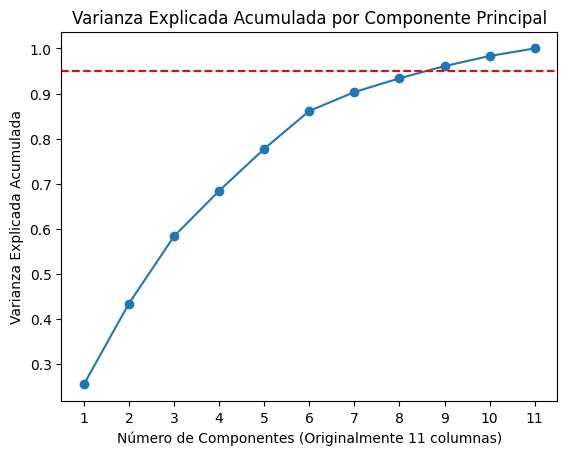

In [23]:
num_columnas_originales = X_labeled.shape[1]  
pca = PCA() # Create the PCA object.
pca.fit(X_labeled_scaled) # Fit the PCA object.

varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

num_componentes = len(varianza_acumulada)

plt.plot(range(1, num_componentes + 1), varianza_acumulada, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--')

plt.xticks(range(1, num_columnas_originales + 1)) # Usa el número de columnas originales para el eje x
plt.xlabel('Número de Componentes (Originalmente ' + str(num_columnas_originales) + ' columnas)')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componente Principal')

plt.show()

In [24]:
X_labeled_scaled_pca.shape

(1195, 9)

La reducción de dimensionalidad mediante PCA ha optimizado el conjunto de datos, conservando el 96% de la varianza explicada en 9 componentes principales. Al eliminar las 11 columnas con contribución marginal, se simplifica el modelo sin sacrificar información relevante, lo que podría traducirse en una mayor eficiencia y rendimiento.

Dividir los datos entre datos de entrenamiento y prueba

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y, test_size=0.2, random_state=42)

In [26]:
X_labeled_scaled_train, X_labeled_scaled_test, _, _ = train_test_split(X_labeled_scaled, y, test_size=0.2, random_state=42)

In [27]:
X_labeled_scaled_pca_train, X_labeled_scaled_pca_test, _, _ = train_test_split(X_labeled_scaled_pca, y, test_size=0.2, random_state=42)

Training SVC...


Accuracy on Original Train: 0.69
Accuracy on Original Test: 0.68
Accuracy on Scaled Train: 0.86
Accuracy on Scaled Test: 0.85
Accuracy on Scaled/PCA Train: 0.86
Accuracy on Scaled/PCA Test: 0.86
--------------------------------------------------


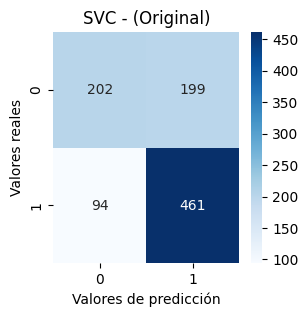

SVC - Classification Report (Original):
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       401
           1       0.70      0.83      0.76       555

    accuracy                           0.69       956
   macro avg       0.69      0.67      0.67       956
weighted avg       0.69      0.69      0.68       956

--------------------------------------------------


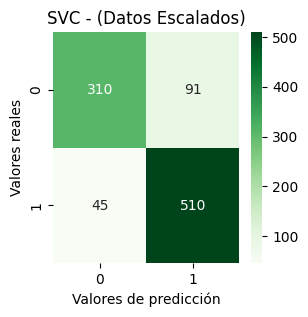

SVC - Classification Report (Scaled):
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       401
           1       0.85      0.92      0.88       555

    accuracy                           0.86       956
   macro avg       0.86      0.85      0.85       956
weighted avg       0.86      0.86      0.86       956

--------------------------------------------------


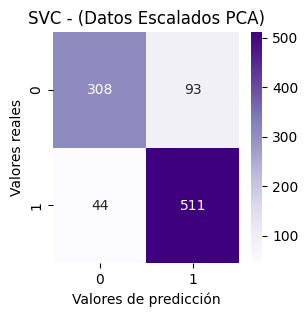

SVC - Classification Report (Scaled PCA):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       401
           1       0.85      0.92      0.88       555

    accuracy                           0.86       956
   macro avg       0.86      0.84      0.85       956
weighted avg       0.86      0.86      0.86       956

--------------------------------------------------
Training Logistic Regression...


Accuracy on Original Train: 0.81
Accuracy on Original Test: 0.83
Accuracy on Scaled Train: 0.82
Accuracy on Scaled Test: 0.83
Accuracy on Scaled/PCA Train: 0.82
Accuracy on Scaled/PCA Test: 0.83
--------------------------------------------------


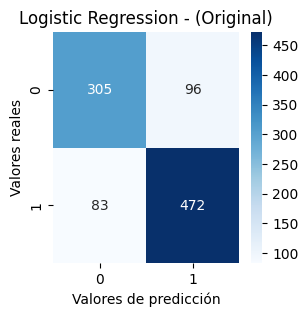

Logistic Regression - Classification Report (Original):
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       401
           1       0.83      0.85      0.84       555

    accuracy                           0.81       956
   macro avg       0.81      0.81      0.81       956
weighted avg       0.81      0.81      0.81       956

--------------------------------------------------


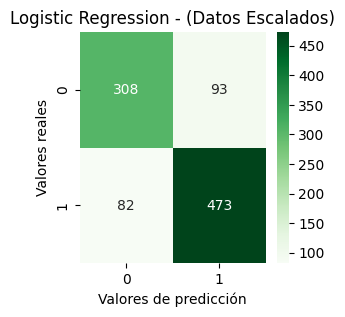

Logistic Regression - Classification Report (Scaled):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       401
           1       0.84      0.85      0.84       555

    accuracy                           0.82       956
   macro avg       0.81      0.81      0.81       956
weighted avg       0.82      0.82      0.82       956

--------------------------------------------------


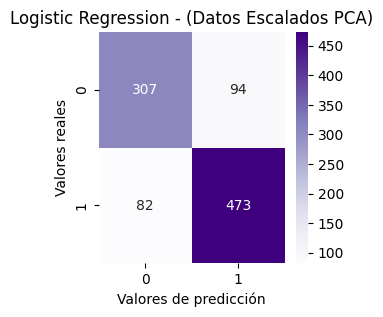

Logistic Regression - Classification Report (Scaled PCA):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       401
           1       0.83      0.85      0.84       555

    accuracy                           0.82       956
   macro avg       0.81      0.81      0.81       956
weighted avg       0.82      0.82      0.82       956

--------------------------------------------------
Training KNN...


Accuracy on Original Train: 0.78
Accuracy on Original Test: 0.67
Accuracy on Scaled Train: 0.87
Accuracy on Scaled Test: 0.82
Accuracy on Scaled/PCA Train: 0.86
Accuracy on Scaled/PCA Test: 0.82
--------------------------------------------------


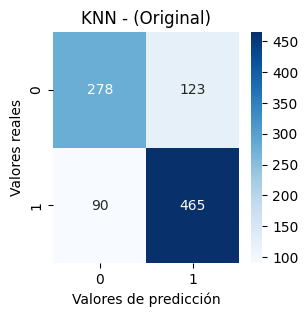

KNN - Classification Report (Original):
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       401
           1       0.79      0.84      0.81       555

    accuracy                           0.78       956
   macro avg       0.77      0.77      0.77       956
weighted avg       0.78      0.78      0.78       956

--------------------------------------------------


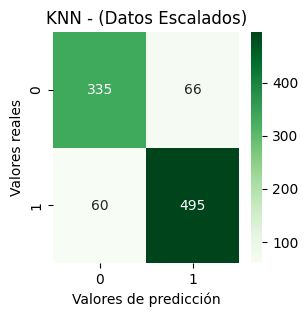

KNN - Classification Report (Scaled):
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       401
           1       0.88      0.89      0.89       555

    accuracy                           0.87       956
   macro avg       0.87      0.86      0.86       956
weighted avg       0.87      0.87      0.87       956

--------------------------------------------------


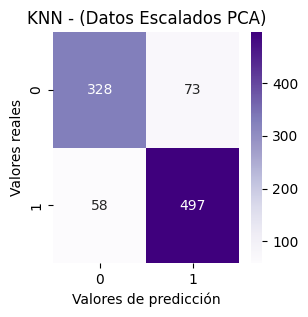

KNN - Classification Report (Scaled PCA):
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       401
           1       0.87      0.90      0.88       555

    accuracy                           0.86       956
   macro avg       0.86      0.86      0.86       956
weighted avg       0.86      0.86      0.86       956

--------------------------------------------------
Training Decision Tree...


Accuracy on Original Train: 1.00
Accuracy on Original Test: 0.76
Accuracy on Scaled Train: 1.00
Accuracy on Scaled Test: 0.76
Accuracy on Scaled/PCA Train: 1.00
Accuracy on Scaled/PCA Test: 0.74
--------------------------------------------------


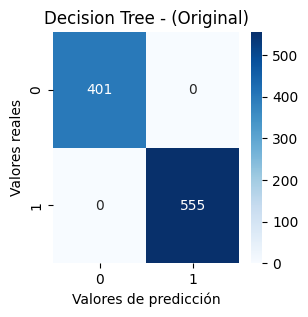

Decision Tree - Classification Report (Original):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------


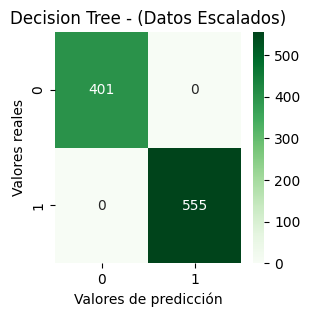

Decision Tree - Classification Report (Scaled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------


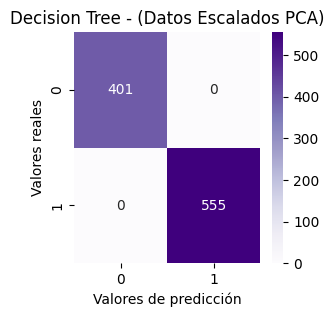

Decision Tree - Classification Report (Scaled PCA):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------
Training Random Forest...


Accuracy on Original Train: 1.00
Accuracy on Original Test: 0.84
Accuracy on Scaled Train: 1.00
Accuracy on Scaled Test: 0.85
Accuracy on Scaled/PCA Train: 1.00
Accuracy on Scaled/PCA Test: 0.81
--------------------------------------------------


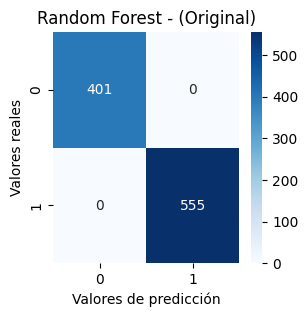

Random Forest - Classification Report (Original):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------


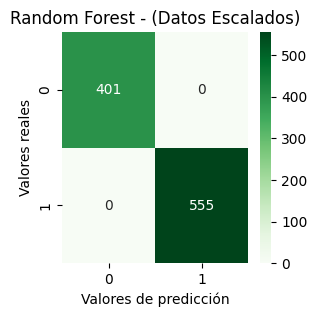

Random Forest - Classification Report (Scaled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------


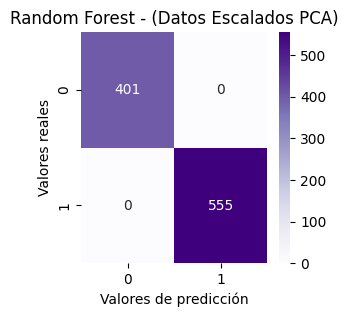

Random Forest - Classification Report (Scaled PCA):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------
Training XGBoost...


Accuracy on Original Train: 1.00
Accuracy on Original Test: 0.84
Accuracy on Scaled Train: 1.00
Accuracy on Scaled Test: 0.84
Accuracy on Scaled/PCA Train: 1.00
Accuracy on Scaled/PCA Test: 0.81
--------------------------------------------------


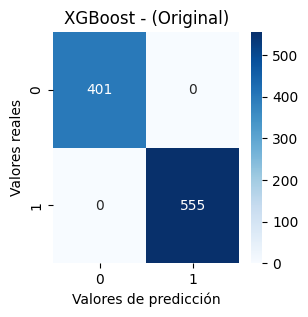

XGBoost - Classification Report (Original):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------


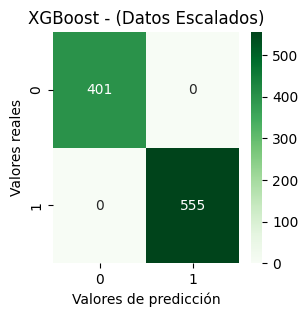

XGBoost - Classification Report (Scaled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------


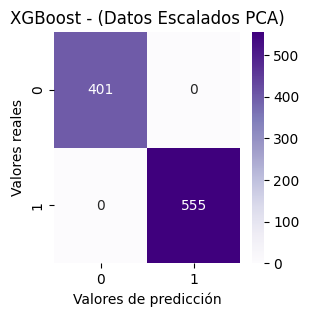

XGBoost - Classification Report (Scaled PCA):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       555

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

--------------------------------------------------
Training Gradient Boosting Classifier...


Accuracy on Original Train: 0.92
Accuracy on Original Test: 0.84
Accuracy on Scaled Train: 0.92
Accuracy on Scaled Test: 0.84
Accuracy on Scaled/PCA Train: 0.93
Accuracy on Scaled/PCA Test: 0.83
--------------------------------------------------


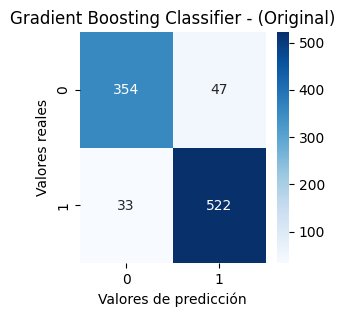

Gradient Boosting Classifier - Classification Report (Original):
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       401
           1       0.92      0.94      0.93       555

    accuracy                           0.92       956
   macro avg       0.92      0.91      0.91       956
weighted avg       0.92      0.92      0.92       956

--------------------------------------------------


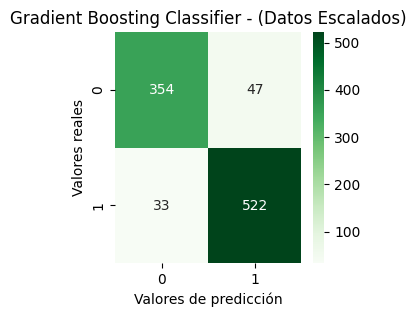

Gradient Boosting Classifier - Classification Report (Scaled):
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       401
           1       0.92      0.94      0.93       555

    accuracy                           0.92       956
   macro avg       0.92      0.91      0.91       956
weighted avg       0.92      0.92      0.92       956

--------------------------------------------------


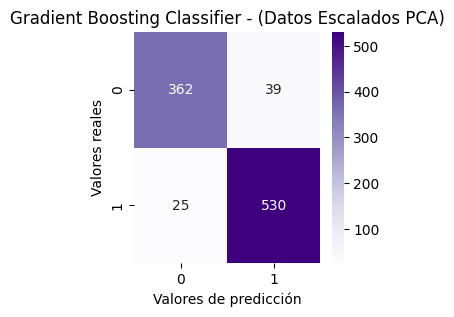

Gradient Boosting Classifier - Classification Report (Scaled PCA):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       401
           1       0.93      0.95      0.94       555

    accuracy                           0.93       956
   macro avg       0.93      0.93      0.93       956
weighted avg       0.93      0.93      0.93       956

--------------------------------------------------


C:\Users\Felipe\AppData\Local\Temp\ipykernel_14264\4064578132.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.figlegend(loc='upper center', ncol=2)


,Metric,SVC,Logistic Regression,KNN,Decision Tree,Random Forest,XGBoost,Gradient Boosting Classifier
0,Original Train,0.69,0.81,0.78,1.00,1.00,1.00,0.92
1,Original Test,0.68,0.83,0.67,0.76,0.84,0.84,0.84
2,Escalado Train,0.86,0.82,0.87,1.00,1.00,1.00,0.92
3,Escalado Test,0.85,0.83,0.82,0.76,0.85,0.84,0.84
4,Escalado PCA Train,0.86,0.82,0.86,1.00,1.00,1.00,0.93
5,Escalado PCA Test,0.86,0.83,0.82,0.74,0.81,0.81,0.83


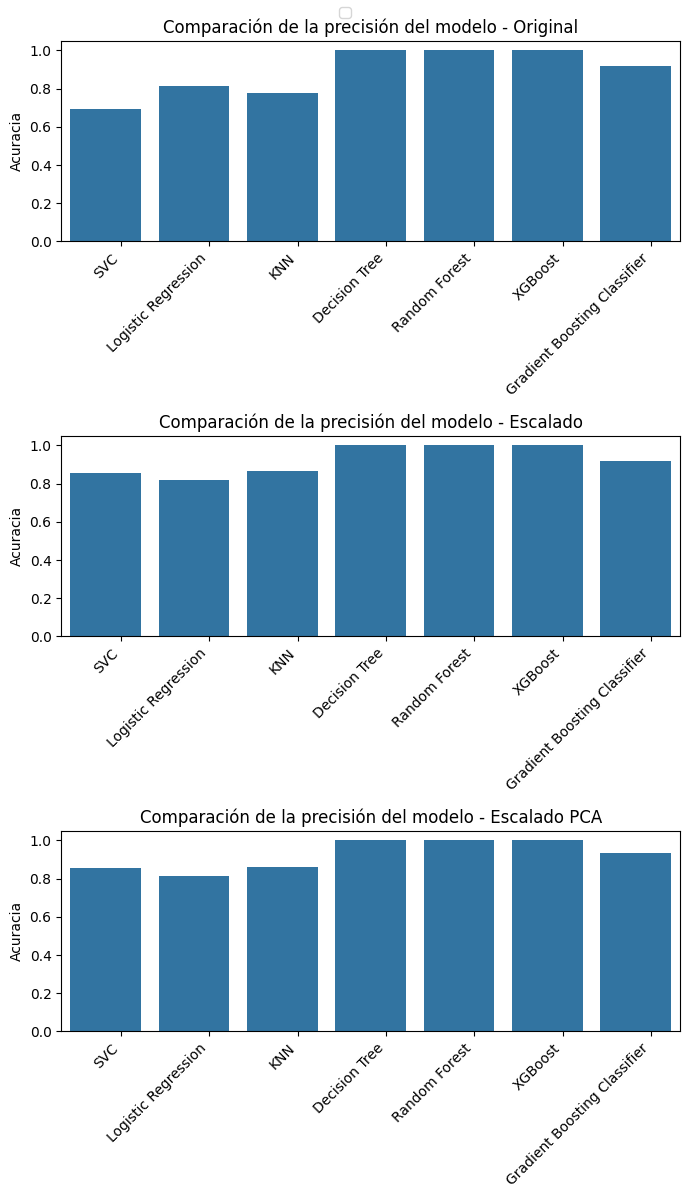

In [28]:
models = {
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}
results = {}


for name, model in models.items():
    print(f"Training {name}...")

    # Original Data
    model.fit(X_train, y_train)
    preds_original_train = model.predict(X_train)
    preds_original_test = model.predict(X_test)
    acc_original_train = accuracy_score(y_train, preds_original_train)
    acc_original_test = accuracy_score(y_test, preds_original_test)

    # Scaled Data
    model.fit(X_labeled_scaled_train, y_train)
    preds_scaled_train = model.predict(X_labeled_scaled_train)
    preds_scaled_test = model.predict(X_labeled_scaled_test)
    acc_scaled_train = accuracy_score(y_train, preds_scaled_train)
    acc_scaled_test = accuracy_score(y_test, preds_scaled_test)

    # Scaled Data with PCA
    model.fit(X_labeled_scaled_pca_train, y_train)
    preds_scaled_pca_train = model.predict(X_labeled_scaled_pca_train)
    preds_scaled_pca_test = model.predict(X_labeled_scaled_pca_test)
    acc_scaled_pca_train = accuracy_score(y_train, preds_scaled_pca_train)
    acc_scaled_pca_test = accuracy_score(y_test, preds_scaled_pca_test)

    print('\n')
    print(f"Accuracy on Original Train: {acc_original_train:.2f}")
    print(f"Accuracy on Original Test: {acc_original_test:.2f}")
    print(f"Accuracy on Scaled Train: {acc_scaled_train:.2f}")
    print(f"Accuracy on Scaled Test: {acc_scaled_test:.2f}")
    print(f"Accuracy on Scaled/PCA Train: {acc_scaled_pca_train:.2f}")
    print(f"Accuracy on Scaled/PCA Test: {acc_scaled_pca_test:.2f}")
    print("-" * 50)

  # Store results
    results[name] = {
        "Original Train": acc_original_train,
        "Original Test": acc_original_test,
        "Escalado Train": acc_scaled_train,
        "Escalado Test": acc_scaled_test,
        "Escalado PCA Train": acc_scaled_pca_train,
        "Escalado PCA Test": acc_scaled_pca_test,
    }

    # Confusion Matrix (Original Data)
    cm_original = confusion_matrix(y_train, preds_original_train)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - (Original)")
    plt.xlabel("Valores de predicción")
    plt.ylabel("Valores reales")
    plt.show()

    # Classification Report (Original Data)
    print(f"{name} - Classification Report (Original):")
    print(classification_report(y_train, preds_original_train))
    print("-" * 50)

    # Confusion Matrix (Scaled Data)
    cm_scaled = confusion_matrix(y_train, preds_scaled_train)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} - (Datos Escalados)")
    plt.xlabel("Valores de predicción")
    plt.ylabel("Valores reales")
    plt.show()

    # Classification Report (Scaled Data)
    print(f"{name} - Classification Report (Scaled):")
    print(classification_report(y_train, preds_scaled_train))
    print("-" * 50)

    # Confusion Matrix (Scaled PCA Data)
    cm_scaled_pca = confusion_matrix(y_train, preds_scaled_pca_train)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_scaled_pca, annot=True, fmt='d', cmap='Purples')
    plt.title(f"{name} - (Datos Escalados PCA)")
    plt.xlabel("Valores de predicción")
    plt.ylabel("Valores reales")
    plt.show()

    # Classification Report (Scaled PCA Data)
    print(f"{name} - Classification Report (Scaled PCA):")
    print(classification_report(y_train, preds_scaled_pca_train))
    print("-" * 50)

# Visualization of comparison between models accuracy
model_names = list(models.keys())

data_transforms = ["Original", "Escalado", "Escalado PCA"]
plt.figure(figsize=(7,12))
plt.figlegend(loc='upper center', ncol=2)
for i, transform in enumerate(data_transforms):
    plt.subplot(3, 1, i + 1)  # 3 rows, 1 column, subplot i+1

    train_accuracies = [results[model][f"{transform} Train"] for model in model_names]

    x = range(len(model_names))
    width = 0.35  # Width of the bars

    sns.barplot(x=x, y=train_accuracies)

    plt.xticks([pos + width / 2 for pos in x], model_names, rotation=45, ha="right")
    plt.ylabel("Acuracia")
    plt.title(f"Comparación de la precisión del modelo - {transform}")
    plt.tight_layout()  # Adjust layout to prevent overlap

    # Create DataFrame
table_data = {
    "Metric": [
        "Original Train",
        "Original Test",
        "Escalado Train",
        "Escalado Test",
        "Escalado PCA Train",
        "Escalado PCA Test",
    ]
}

for model_name in models:
    table_data[model_name] = [round(results[model_name][metric],2) for metric in table_data['Metric']]

df_results = pd.DataFrame(table_data)
df_results

In [29]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'degree': [2, 3, 4]  # Only matters for 'poly' kernel
}

param_grid_gbc = {
    'n_estimators':[20,50,100,250],
    'learning_rate':[0.05, 0.1, 0.5],
    'max_depth':[1,2,3,4,5,None]
}

param_grid_knn = {
        'n_neighbors': [3, 5, 7, 9, 11, 15],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weighting method
        'p': [1, 2]  # Minkowski distance (1: Manhattan, 2: Euclidean)
}

# Initialize the model
svm_model = SVC()
gbc = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_svm.fit(X_labeled_scaled_train, y_train)

grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gbc.fit(X_labeled_scaled_pca_train, y_train)

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(X_labeled_scaled_train, y_train)

best_scores = {
    "SVC": grid_search_svm.best_score_.round(2),
    "Gradient Boosting Classifier": grid_search_gbc.best_score_.round(2),
    "KNN": grid_search_knn.best_score_.round(2)
}

best_scores_df = pd.DataFrame(list(best_scores.items()), columns=['Model', 'Best Score'])
best_scores_df


,Model,Best Score
0,SVC,0.90
1,Gradient Boosting Classifier,0.89
2,KNN,0.89
